# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [27]:
def F(n):
    for row in range(n):
        for col in range(n-1, -n, -1):
            if abs(col) <= row:
                print(chr(abs(col) + 65), end='')
            else:
                print("-", end='')
        print()
    print()
            

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ

-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [28]:
def F(d : dict):
    print(f"Printing by key values ascending")
    for key in sorted(d.keys()):
        print(f"{key}, {d[key][0]}, {d[key][1]}")

    print(f"Printing by x values descending")
    for key, (x, y) in sorted(d.items(), key=lambda x: x[1][0], reverse=True): # d.items() will give [(key, (x, y)), ...]
        print(f"{key}, {x}, {y}")

    print(f"Printing by y values ascending")
    for key, (x, y) in sorted(d.items(), key=lambda x: x[1][1]):
        print(f"{key}, {x}, {y}")

    print()

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Printing by key values ascending
1, 1, 2
2, -1, 4
4, 2, 3
5, -4, 3
Printing by x values descending
4, 2, 3
1, 1, 2
2, -1, 4
5, -4, 3
Printing by y values ascending
1, 1, 2
5, -4, 3
4, 2, 3
2, -1, 4

Printing by key values ascending
-8, 4, 2
5, 9, -10
6, -3, 4
7, 2, 1
Printing by x values descending
5, 9, -10
-8, 4, 2
7, 2, 1
6, -3, 4
Printing by y values ascending
5, 9, -10
7, 2, 1
-8, 4, 2
6, -3, 4



## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


In [8]:
# Commented Code includes the part where all data was first stored into a dictionary and then processed further
# student_records_dict = dict()
# counter = 0
# with open("student_records.csv") as f:
#     headings = f.readline().strip().split(",")
#     student_records_dict[counter] = list()
#     for h in headings:
#         student_records_dict[counter].append(h)
#     counter += 1
#     for line in f:
#         student_records_dict[counter] = list()
#         values = line.strip().split(",")
#         for val in values:
#             student_records_dict[counter].append(val)
#         counter += 1

#### 2.a: open the student_records.csv file and print out the first 10 rows

In [27]:
# print("Student Roll Number\tDepartment\tCredit\tCourse\tTag\tGrade")
# for i in range(1, 11):
#     temp_list = student_records_dict[i]
#     print(f"{temp_list[0]}\t{temp_list[1]}\t{temp_list[2]}\t{temp_list[3]}\t{temp_list[4]}\t{temp_list[5]}")

Student Roll Number	Department	Credit	Course	Tag	Grade
588946	MA	3	EC250	hasmed_elective	AB
145372	EP	4	EP407	hasmed_elective	CC
834515	MA	8	EP885	hasmed_elective	BB
344265	CSE	6	CSE699	honours	AB
358405	MA	3	EE460	minor	AP
781075	CE	8	CE540	honours	CC
180828	CSE	6	CE880	minor	AB
981238	MM	4	CSE226	minor	AB
836881	MM	8	MM530	core	AA
310604	EE	8	EE202	core	AB


In [34]:
counter = 0
with open("student_records.csv") as f:
    headings = f.readline().strip().split(",")
    for h in headings:
        print(h, end='\t')
    print()
    counter += 1
    while counter <= 10:
        values = f.readline().strip().split(",")
        for item in values:
            print(item, end='\t')
        print()
        counter += 1

roll_number	department	credit	course_name	course_type	grade	
588946	MA	3	EC250	hasmed_elective	AB	
145372	EP	4	EP407	hasmed_elective	CC	
834515	MA	8	EP885	hasmed_elective	BB	
344265	CSE	6	CSE699	honours	AB	
358405	MA	3	EE460	minor	AP	
781075	CE	8	CE540	honours	CC	
180828	CSE	6	CE880	minor	AB	
981238	MM	4	CSE226	minor	AB	
836881	MM	8	MM530	core	AA	
310604	EE	8	EE202	core	AB	


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [35]:
grade_mapping_dict = {
    'AP': 10,
    'AA': 10,
    'AB': 9,
    'BB': 8,
    'BC': 7,
    'CC': 6,
    'CD': 5,
    'DD': 4,
    'FR': 0
}

In [41]:
student_grouped = dict()
with open("student_records.csv") as f:
    headings = f.readline()
    for line in f:
        temp_list = line.strip().split(',')

        if temp_list[0] in student_grouped:
            student_grouped[temp_list[0]][temp_list[4]] += int(temp_list[2])
            if temp_list[4] in ['core', 'department_elective', 'flexible_elective', 'hasmed_elective']:
                student_grouped[temp_list[0]]['total_credits'] += int(temp_list[2])
                student_grouped[temp_list[0]]['weighted_credits'] += int(temp_list[2])*int(grade_mapping_dict[temp_list[-1]])
            elif temp_list[4] == 'minor':
                student_grouped[temp_list[0]]['minor_credits_weighted'] += int(grade_mapping_dict[temp_list[-1]])*int(temp_list[2])
        else:
            student_grouped[temp_list[0]] = {
                'core': 0,
                'department_elective': 0,
                'flexible_elective': 0,
                'hasmed_elective': 0,
                'honours': 0,
                'alc': 0,
                'minor': 0,
                'total_credits': 0,
                'weighted_credits': 0,
                'minor_credits_weighted': 0,
                'CPI': 0,
                'minor_CPI': 0
            }

print("Student_ID\tTotal_Credits\tCPI")
for student_id in student_grouped:
    student_grouped[student_id]['CPI'] = student_grouped[student_id]['weighted_credits']/student_grouped[student_id]['total_credits']
    if student_grouped[student_id]['minor'] != 0:
        student_grouped[student_id]['minor_CPI'] = student_grouped[student_id]['minor_credits_weighted']/student_grouped[student_id]['minor']
    print(f"{student_id}\t{student_grouped[student_id]['total_credits']}\t{student_grouped[student_id]['CPI']}")

Student_ID	Total_Credits	CPI
588946	112	8.660714285714286
145372	94	7.48936170212766
834515	138	8.108695652173912
344265	80	8.9
358405	120	8.208333333333334
781075	168	8.470238095238095
180828	114	7.9035087719298245
981238	120	8.275
836881	108	7.768518518518518
310604	107	8.158878504672897
847809	100	8.27
773982	131	7.770992366412214
500658	124	8.153225806451612
810863	104	8.057692307692308
124663	100	8.23
364146	91	8.857142857142858
871746	111	7.792792792792793
270007	140	7.75
597353	77	8.077922077922079
986057	148	7.925675675675675
718510	118	8.703389830508474
836431	78	7.653846153846154
379479	147	8.068027210884354
582912	103	9.29126213592233
788020	87	8.022988505747126
613401	112	8.3125
144528	112	8.571428571428571
485484	132	8.659090909090908
680096	65	8.276923076923078
199713	102	8.03921568627451
851029	106	8.11320754716981
845623	161	8.459627329192546
150503	130	8.5
214270	118	7.338983050847458
517837	101	8.326732673267326
482623	123	8.520325203252032
721490	170	8.35294117647058

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [46]:
eligible_for_graduation_count = 0
for student_id in student_grouped:
    if student_grouped[student_id]['core'] >= 20 and student_grouped[student_id]['department_elective'] >= 15 and student_grouped[student_id]['flexible_elective'] >= 10 and student_grouped[student_id]['hasmed_elective'] >= 5:
        print(f"{student_id} is eligible for graduation")
        eligible_for_graduation_count += 1
print(f"A total of {eligible_for_graduation_count} students are eligible for graduation")

588946 is eligible for graduation
834515 is eligible for graduation
781075 is eligible for graduation
180828 is eligible for graduation
981238 is eligible for graduation
773982 is eligible for graduation
500658 is eligible for graduation
810863 is eligible for graduation
124663 is eligible for graduation
871746 is eligible for graduation
986057 is eligible for graduation
379479 is eligible for graduation
144528 is eligible for graduation
485484 is eligible for graduation
845623 is eligible for graduation
150503 is eligible for graduation
214270 is eligible for graduation
517837 is eligible for graduation
482623 is eligible for graduation
721490 is eligible for graduation
955757 is eligible for graduation
143856 is eligible for graduation
571782 is eligible for graduation
973158 is eligible for graduation
703403 is eligible for graduation
960395 is eligible for graduation
521087 is eligible for graduation
461971 is eligible for graduation
879634 is eligible for graduation
716985 is elig

#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [45]:
minor_count = 0
for student_id in student_grouped:
    if student_grouped[student_id]['minor'] >= 10:
        print(f"{student_id} has completed a minor")
        minor_count += 1
print(f"A total of {minor_count} students have completed minor")

588946 has completed a minor
145372 has completed a minor
834515 has completed a minor
344265 has completed a minor
358405 has completed a minor
781075 has completed a minor
981238 has completed a minor
836881 has completed a minor
847809 has completed a minor
773982 has completed a minor
500658 has completed a minor
810863 has completed a minor
124663 has completed a minor
364146 has completed a minor
871746 has completed a minor
270007 has completed a minor
597353 has completed a minor
986057 has completed a minor
718510 has completed a minor
836431 has completed a minor
379479 has completed a minor
582912 has completed a minor
788020 has completed a minor
613401 has completed a minor
144528 has completed a minor
485484 has completed a minor
680096 has completed a minor
199713 has completed a minor
851029 has completed a minor
845623 has completed a minor
150503 has completed a minor
214270 has completed a minor
517837 has completed a minor
482623 has completed a minor
721490 has com

#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [47]:
honours_count = 0
for student_id in student_grouped:
    if student_grouped[student_id]['honours'] >= 10 and student_grouped[student_id]['core'] >= 20:
        print(f"{student_id} has completed a minor")
        honours_count += 1
print(f"A total of {honours_count} students have completed a honours")

588946 has completed a minor
145372 has completed a minor
834515 has completed a minor
781075 has completed a minor
773982 has completed a minor
500658 has completed a minor
810863 has completed a minor
124663 has completed a minor
364146 has completed a minor
871746 has completed a minor
986057 has completed a minor
718510 has completed a minor
379479 has completed a minor
582912 has completed a minor
788020 has completed a minor
613401 has completed a minor
144528 has completed a minor
485484 has completed a minor
199713 has completed a minor
845623 has completed a minor
150503 has completed a minor
214270 has completed a minor
517837 has completed a minor
482623 has completed a minor
721490 has completed a minor
955757 has completed a minor
589528 has completed a minor
143856 has completed a minor
571782 has completed a minor
973158 has completed a minor
703403 has completed a minor
960395 has completed a minor
521087 has completed a minor
461971 has completed a minor
879634 has com

# **SciPy** 

In [5]:
import numpy as np
from scipy.optimize import minimize

In [3]:
?scipy.optimize.minimize

Object `scipy.optimize.minimize` not found.


## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [6]:
function = lambda variables: 2*(variables[0] - variables[1] - 3)**2 + 4*(variables[0] + 2*variables[1] + 1)**4
constraints = [
    {'type': 'ineq', 'fun': lambda variables: variables[0] - variables[1] + 3},
    {'type': 'ineq', 'fun': lambda variables: - (variables[0] + 2)**2 - (variables[1] + 1)**2 + 5}
]
initial_guess = [0, 0]
part_a = minimize(fun=function, x0=initial_guess, method='SLSQP', constraints=constraints)
print("Optimal solution:", part_a.x)
print("Objective value:", part_a.fun)

Optimal solution: [ 0.23492503 -0.92851489]
Objective value: 7.345026216976594


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [75]:
# ?scipy.integrate.quad
from scipy.integrate import quad
quad?

Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCa

In [7]:
def integrand(t, radii = np.sqrt(3)):
    x, y = radii*np.cos(t), radii*np.sin(t)
    dx_dt, dy_dt = - radii*np.sin(t), radii*np.cos(t)
    ds_dt = np.sqrt(dx_dt**2 + dy_dt**2)
    return (x**2 + y**4) * ds_dt

t_min, t_max = 0, 2*np.pi 
result, error = quad(integrand, t_min, t_max)
print(f"The value of the line integral is approximately: {result:.5f}")

The value of the line integral is approximately: 53.05363


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [76]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [79]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [80]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers:
        centers = init_centers
    else:
       centers = data[np.random.choice(data.shape[0], K, replace=False)]
           
    return centers

In [81]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = np.ones(data.shape[0], dtype=int)    
    return labels


In [82]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distance_array = np.zeros((data.shape[0], centers.shape[0]), dtype=float)
    for n, d_point in enumerate(data):
        for k, center in enumerate(centers):
            distance_array[n][k] = np.sqrt((d_point[0] - center[0])**2 + (d_point[1] - center[1])**2)
    return distance_array

In [83]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [84]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    new_centers = np.zeros((K, data.shape[1]), dtype=float)
    
    for k in range(K):
        cluster_points = data[labels == k]        
        if len(cluster_points) > 0:
            new_centers[k] = cluster_points.mean(axis=0)
    
    return new_centers

In [85]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if np.all(np.abs(labels1 - labels2)) < 1e-3:
        return True
    else:
        return False

In [86]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [87]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0009331703186035156


<module 'matplotlib.pyplot' from '/home/anupam/miniconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

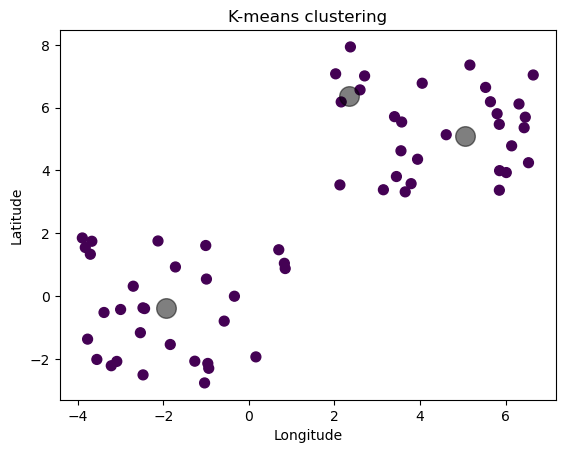

In [91]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 3, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)